In [3]:
#5_QueryDataUsingOpenSafelyCodelist.ipynb



library(bigrquery)
library(lubridate) # required for datetime



project_id = "yhcr-prd-phm-bia-core"

targetdb <-'yhcr-prd-phm-bia-core.CB_MYSPACE_JDB'
sourcedb <-'yhcr-prd-phm-bia-core.CB_FDM_PrimaryCare_V8'



In [20]:
sql63 <-paste('SELECT date_diff(current_date,birth_datetime,YEAR) as age
, left(per.gender_source_value,1)  as gender
,count(per.person_id) as Countx
 FROM ', targetdb , '.mss ms
 , ' ,sourcedb,'.tbl_srcode sr
 , ' ,sourcedb,'.person per
 where ms.Readcodes = sr.ctv3code
 and sr.person_id = per.person_id 
group by date_diff(current_date,birth_datetime,YEAR), left(per.gender_source_value,1) 
 ', sep = "")

tb63 <-bq_project_query(project_id, sql63)


table <- bq_table_download(tb63)
# This line below just displays the data.
#table 



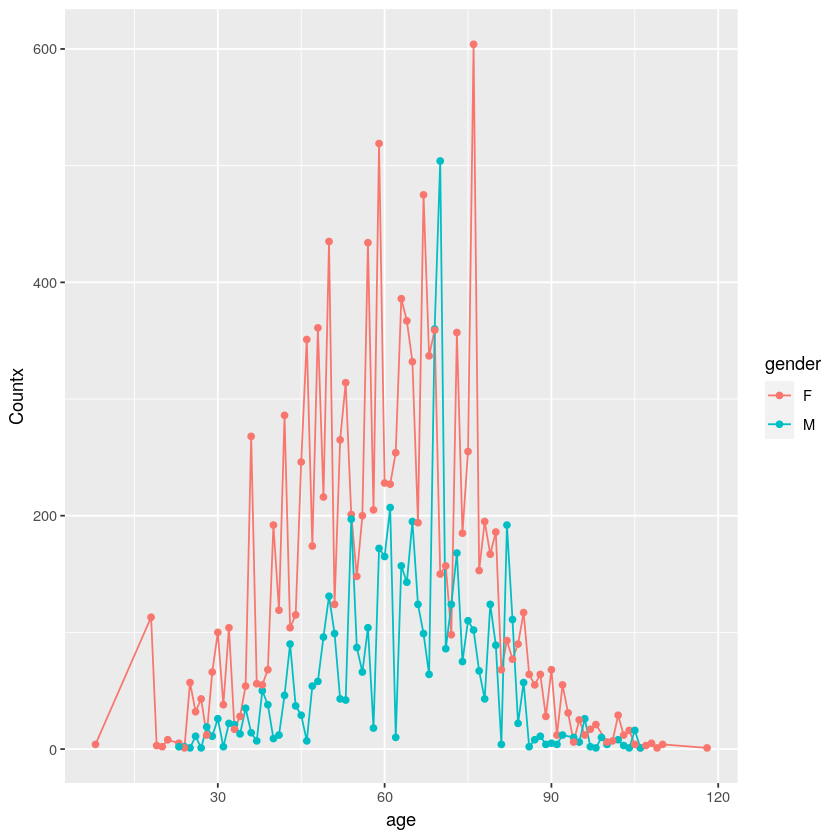

In [29]:
p<-ggplot(data=table, aes(x=age, y=Countx, group=gender)) +
  geom_line(aes(color=gender))+
  geom_point(aes(color=gender))
p

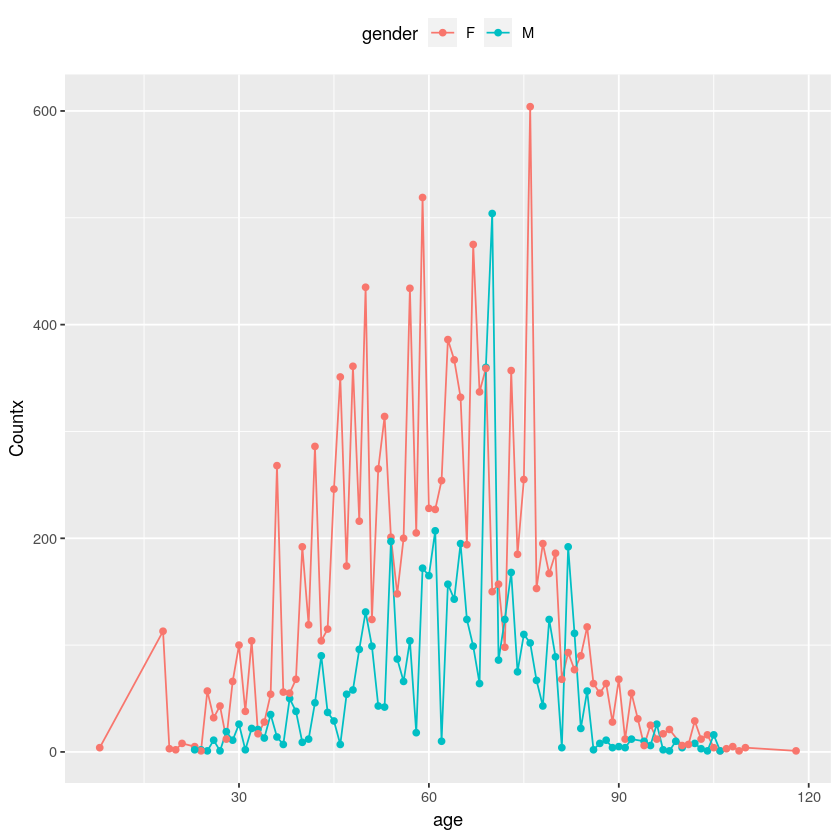

In [37]:
#change the legend position
#p <- p + scale_color_brewer(palette="Paired")+
#  theme_minimal()

p + theme(legend.position="top")
#p + theme(legend.position="bottom")
# Remove legend
#p + theme(legend.position="none")
#png('p.png')


In [39]:
#Top save the plot as a jpg
# 1. Open jpeg file
jpeg("mplot.jpg", width = 650, height = 350)
# 2. Create the plot
p <-ggplot(data=table, aes(x=age, y=Countx, group=gender)) +
  geom_line(aes(color=gender))+
  geom_point(aes(color=gender))
p

p + theme(legend.position="top")

# 3. Close the file
dev.off()

png 
  2

In [42]:
#Top save the plot as a pdf
# 1.Open a pdf file
pdf("rplot.pdf") 
# 2. Create the plot
# 2. Create the plot
p <-ggplot(data=table, aes(x=age, y=Countx, group=gender)) +
  geom_line(aes(color=gender))+
  geom_point(aes(color=gender))
p

# 3. Close the file
dev.off()

png 
  2